# WQD7003 Data Analytics Group Project
## Loan Default Prediction
### Kaggle Dataset - https://www.kaggle.com/c/loan-default-prediction/overview


#### Import packages
- os     - operating system functionality
- pandas - manipulating data structures
- numpy  - manipulating arrays and matrices, mathematical functions
- matplotlib - plots

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Identify current working directory and dataset path
- Train and Test dataset provided.
- An example of sample submission also provided. 
- All dataset in CSV file format. 

In [2]:
cwd = os.getcwd()
print(cwd)


C:\GitCloneDir\wqd7003_project\project_wqd7003_git


In [3]:
train_path = "C:\\GitCloneDir\\wqd7003_project\\data\\train_v2.csv"
test_path = "C:\\GitCloneDir\\wqd7003_project\\data\\test_v2.csv"


#### Load training data into Pandas dataframe
Note: to get hints to help with code completion, press "Tab" or "Shift + Tab"
1. Check file size. 
2. Load training dataset to dataframe.
3. Random split data to reduce computation and load times. 
4. View number of rows (records) and columns (attributes).
5. Overview of dataframe (info and describe())
6. Data types 
7. Looking at null values

In [4]:
# Have a look at training file size
file_size = int(os.path.getsize(train_path)/1024)  

if file_size > 99999:
    final_size = str(file_size/1000) + " MB"
else:
    final_size = str(file_size) + " KB"

print(final_size)


498.987 MB


In [5]:
df = pd.read_csv(train_path, low_memory=False, index_col=0)
df_train = df.sample(frac=0.35, random_state=0)


In [6]:
# Number of rows and columns
print(str(len(df_train)) + " rows")
print(str(len(df_train.columns)) + " columns")

# Another way...
df_train.shape

36915 rows
770 columns


(36915, 770)

In [7]:
# Number of rows, columns, & other info
df_train.info


<bound method DataFrame.info of          f1  f2        f3    f4  f5     f6      f7      f8      f9     f10  \
id                                                                           
43477   126  10  0.307234  1500  16  81166  2571.0  2217.0  126.76  126.11   
104243  121   6  0.549930  1800   4   2277  5263.0  3210.0  124.50  121.93   
64652   138   9  0.603740  3500   7  75884   231.0  2851.0  143.10  139.09   
74394   126   3  0.393476  2200   4   3659  6035.0  4017.0  127.70  126.32   
28213   133   9  0.658447  3500   7  76973  7248.0  1253.0  132.54  132.71   
...     ...  ..       ...   ...  ..    ...     ...     ...     ...     ...   
17664   117  10  0.863017  1500   4   8563    47.0   658.0  118.25  116.80   
622     125   8  0.341056  1800   4  12769  1210.0  1640.0  118.45  123.06   
53078   127   8  0.757637  2100  16   8563  8506.0  1575.0  130.50  127.62   
32773   119  10  0.835838  2200  15  11699   381.0  1134.0  119.15  118.95   
56924   163   7  0.368922  4200 

In [8]:
# Take a quick look at the data
df_train.describe()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36847.000000,36875.000000,36915.000000,36915.000000,...,36915.000000,36915.000000,36915.000000,36915.000000,36552.000000,36404.000000,36915.000000,36915.000000,36915.000000,36915.000000
mean,134.582175,8.240282,0.498371,2670.843830,7.378545,47864.246919,2986.554591,2449.148881,134.511458,134.571502,...,17.381200,5.781511,-4.232515,3.262156,0.234393,0.010745,0.310822,0.321197,178.687255,0.799269
std,14.725677,1.703544,0.289190,1403.195577,5.174325,35687.048346,2557.027595,2280.352004,13.807276,14.498341,...,18.413914,6.459544,4.792628,3.739509,0.073412,1.034464,0.462836,0.466943,301.478556,4.299221
min,103.000000,1.000000,0.000040,1100.000000,1.000000,0.000000,1.000000,1.000000,107.910000,104.070000,...,2.000000,0.000000,-42.710000,0.000000,0.000000,-17.498900,0.000000,0.000000,2.000000,0.000000
25%,124.000000,8.000000,0.248443,1500.000000,4.000000,11255.000000,634.000000,743.000000,124.270000,123.890000,...,5.000000,1.480000,-5.670000,0.750000,0.199800,-0.704225,0.000000,0.000000,19.000000,0.000000
50%,129.000000,9.000000,0.496777,2200.000000,4.000000,76530.000000,2290.000000,1785.000000,128.410000,129.060000,...,11.000000,3.570000,-2.600000,1.990000,0.252300,0.368100,0.000000,0.000000,40.000000,0.000000
75%,148.000000,9.000000,0.750335,3600.000000,10.000000,80135.000000,4700.000000,3430.500000,148.880000,148.205000,...,23.000000,7.670000,-1.020000,4.410000,0.283800,0.734700,1.000000,1.000000,104.000000,0.000000
max,176.000000,11.000000,0.999970,7900.000000,17.000000,88399.000000,9962.000000,11541.000000,171.770000,175.230000,...,167.000000,58.120000,0.000000,32.780000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


In [9]:
# Data types int64, float64, object
col_names = df_train.columns.values

# Get  columns whose data type is object i.e. string, int64, float64
filtColObj = df_train.dtypes[df_train.dtypes == np.object]
filtColInt = df_train.dtypes[df_train.dtypes == np.int64]
filtColFlt = df_train.dtypes[df_train.dtypes == np.float64]
 
# list of columns whose data type is object i.e. string, int64, float64
listColNamesObj = list(filtColObj.index)
listColNamesInt = list(filtColInt.index)
listColNamesFlt = list(filtColFlt.index)
 
print(str(len(listColNamesObj)) + " Objects")
print(str(len(listColNamesInt)) + " Int64")
print(str(len(listColNamesFlt)) + " Float64")


19 Objects
98 Int64
652 Float64


In [10]:
# Taking a look at null values
df_train.isnull()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
id,,,,,,,,,,,,,,,,,,,,,
43477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104243,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17664,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53078,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Remove rows that has all NULL values - in this case, none of the rows have all NULL values
df_train = df_train.dropna(axis=0, how='all')
print(len(df_train))

# Remove columns that has all NULL values - in this case, none of the columns have all NULL values
df_train = df_train.dropna(axis=1, how='all')
print(len(df_train.columns))


36915
770


In [12]:
# Find max percentage of NULL values per column
print(max(df_train.isnull().mean(axis=0))*100)

# Find max percentage of NULL values per row
print(max(df_train.isnull().mean(axis=1))*100)


17.800352160368412
44.935064935064936


In [13]:
# View of data with null values
df_train_null = df_train.loc[:,df_train.isnull().mean()>0]
print(df_train_null.head(5))
print(df_train_null.tail(5))

# Number of columns with null values
len(df_train_null.columns)


            f7      f8     f14     f15     f17     f18     f19     f20  \
id                                                                       
43477   2571.0  2217.0  0.7265  0.7203  0.7203  0.7203  0.4871  0.7265   
104243  5263.0  3210.0  0.8739  0.8387  0.8455  0.8387  0.6877  0.8387   
64652    231.0  2851.0  0.0000  0.0000  0.0000  0.0000  0.0769  0.0000   
74394   6035.0  4017.0  0.8197  0.8197  0.8000  0.8000  0.6552  0.8065   
28213   7248.0  1253.0  0.8636  0.8407  0.8120  0.8120  0.6644  0.8407   

           f21     f22  ...     f757    f758    f759      f760     f761  \
id                      ...                                               
43477   0.7456  0.7456  ...   5.3580  4.1735  3.2692  0.062208   6.7402   
104243  0.9123  0.9043  ...   2.1423  1.8442  1.6037  0.097507   2.5248   
64652   0.0000  0.0000  ...   7.2960  5.5056  4.2457  0.367089   8.9215   
74394   0.8065  0.8065  ...  10.7355  9.7894  8.9452  0.044094  12.0256   
28213   0.9500  0.8482  ...   8

525

In [14]:
# Columns with float or int data types
df_train_obj = df_train_null.loc[:, df_train_null.dtypes=='object']
print(df_train_obj.head())


                        f137                        f138  \
id                                                         
43477       1310000000000000        98870400435828998144   
104243  45723353039583002624  82266081252861995401609216   
64652          1350000000000            9050000000000000   
74394      73000000000000000     14190769661866999283712   
28213      10400000000000000      1350797145644000083968   

                        f206                         f207  \
id                                                          
43477            14564170412               33400000000000   
104243  52641157214791000064  109086041397580002356101120   
64652            38100719961               84000000000000   
74394      78800000000000000      16070116981790000283648   
28213          5170000000000            49300000000000000   

                        f276                         f277  \
id                                                          
43477        415000000000000 

In [15]:
df_train_obj.describe()

,f137,f138,f206,f207,f276,f277,f390,f391,f626,f627,f695,f698
count,36847,36847,36473,36473,36875,36875,36687,36687,36687,36687,36687,36687
unique,3678,16998,9500,9181,3454,15574,36673,36671,36685,36683,33444,32807
top,3870000000000000,0,0,0,1240000000000000,116000000000000000,4585819461816299954431328256,6047083129147399870720121575986692096,5167416158078900268779438080,7090680550168100523564513132407685120,3590000000000000000,4520000000000000000
freq,265,159,1862,1862,244,125,3,3,3,3,13,15


#### Columns with Object data types does not make any sense. 
1. Too many unique values
2. Undefined values

Therefore shall be dropped.


In [16]:
df_train_null = df_train_null.drop(df_train_obj.columns.values, axis=1)


In [17]:
df_train_null.describe()


,f7,f8,f14,f15,f17,f18,f19,f20,f21,f22,...,f757,f758,f759,f760,f761,f762,f763,f765,f774,f775
count,36847.000000,36875.000000,36875.000000,36892.000000,36856.000000,36904.000000,36904.000000,36753.000000,36267.000000,36316.000000,...,36656.000000,36656.000000,36656.000000,36461.000000,36856.000000,36856.000000,36267.000000,36914.000000,36552.000000,36404.000000
mean,2986.554591,2449.148881,0.696295,0.678069,0.673510,0.648957,0.510359,0.685725,0.746074,0.726449,...,10.560316,8.746051,7.309476,0.136267,12.878029,12.061513,-0.253926,-0.471214,0.234393,0.010745
std,2557.027595,2280.352004,0.243126,0.242331,0.233165,0.247664,0.173677,0.241718,0.238366,0.234298,...,12.789758,10.905417,9.356903,0.112744,14.850395,14.036544,0.238366,0.284813,0.073412,1.034464
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.970000,0.000000,-17.498900
25%,634.000000,743.000000,0.680000,0.661300,0.656000,0.635600,0.431775,0.669400,0.729000,0.710500,...,2.552900,1.965475,1.539700,0.056635,3.370900,3.066200,-0.271000,-0.710000,0.199800,-0.704225
50%,2290.000000,1785.000000,0.771200,0.754200,0.745800,0.736000,0.539600,0.761900,0.818200,0.798200,...,5.842850,4.688300,3.810550,0.082184,7.563000,7.047850,-0.181800,-0.500000,0.252300,0.368100
75%,4700.000000,3430.500000,0.831900,0.815400,0.804900,0.796700,0.626900,0.823500,0.876100,0.857100,...,13.252350,10.923850,9.117900,0.219610,16.462750,15.416750,-0.123900,-0.230000,0.283800,0.734700
max,9962.000000,11541.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,111.937000,95.102300,82.293100,0.490885,127.195100,120.425000,0.000000,0.000000,0.473700,11.092000


#### Graphical view of data
1. Histogram view of data particular those with higher number of null values. 
2. Decide how to impute data. 

['f14' 'f15' 'f17' 'f18' 'f19' 'f20' 'f21' 'f22' 'f32' 'f39' 'f40' 'f41'
 'f43' 'f44' 'f45' 'f46' 'f47' 'f49' 'f50' 'f51' 'f53' 'f54' 'f55' 'f56'
 'f57' 'f59' 'f60' 'f61' 'f63' 'f64' 'f65' 'f66' 'f75' 'f77' 'f80' 'f81'
 'f82' 'f83' 'f84' 'f89' 'f90' 'f91' 'f92' 'f93' 'f94' 'f99' 'f100' 'f101'
 'f102' 'f103' 'f104' 'f109' 'f110' 'f111' 'f112' 'f113' 'f114' 'f119'
 'f120' 'f121' 'f122' 'f123' 'f124' 'f129' 'f130' 'f131' 'f140' 'f141'
 'f142' 'f144' 'f149' 'f150' 'f151' 'f152' 'f153' 'f158' 'f159' 'f160'
 'f161' 'f162' 'f163' 'f168' 'f169' 'f170' 'f171' 'f172' 'f173' 'f178'
 'f179' 'f180' 'f181' 'f182' 'f183' 'f188' 'f189' 'f190' 'f191' 'f192'
 'f193' 'f198' 'f199' 'f200' 'f209' 'f210' 'f211' 'f213' 'f218' 'f219'
 'f220' 'f221' 'f222' 'f223' 'f228' 'f229' 'f230' 'f231' 'f232' 'f233'
 'f238' 'f239' 'f240' 'f241' 'f242' 'f243' 'f248' 'f249' 'f250' 'f251'
 'f252' 'f253' 'f258' 'f259' 'f260' 'f261' 'f262' 'f263' 'f268' 'f269'
 'f270' 'f279' 'f280' 'f289' 'f330' 'f331' 'f340' 'f341' 'f349' 'f3

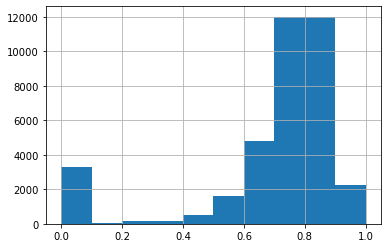

In [18]:
# having a look at histogram (data < 3 std)
less_3sd = df_train_null.loc[:, df_train_null.std()<3]
print(less_3sd.columns.values)
less_3sd['f14'].hist()
plt.show()

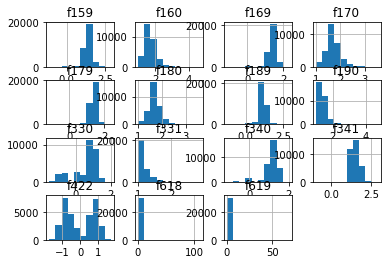

In [19]:
# Histogram view of attributes within 3sd
col_names = less_3sd.columns.values
null_list=[]

for names in col_names:
    if less_3sd[names].isnull().mean()>0.1:
        null_list.append(names)

less_3sd[null_list].hist()
plt.show()


In [20]:
less_3sd.describe()

,f14,f15,f17,f18,f19,f20,f21,f22,f32,f39,...,f696,f716,f746,f751,f756,f760,f763,f765,f774,f775
count,36875.000000,36892.000000,36856.000000,36904.000000,36904.000000,36753.000000,36267.000000,36316.000000,36000.000000,36894.000000,...,36890.000000,36809.000000,36440.000000,36423.000000,36838.000000,36461.000000,36267.000000,36914.000000,36552.000000,36404.000000
mean,0.696295,0.678069,0.673510,0.648957,0.510359,0.685725,0.746074,0.726449,0.860182,0.645649,...,0.233982,1.402816,-0.042618,0.138711,0.119868,0.136267,-0.253926,-0.471214,0.234393,0.010745
std,0.243126,0.242331,0.233165,0.247664,0.173677,0.241718,0.238366,0.234298,0.213017,0.192896,...,0.075211,0.318033,0.808584,0.115465,0.063879,0.112744,0.238366,0.284813,0.073412,1.034464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.409800,0.000000,0.000000,0.000000,-1.000000,-0.970000,0.000000,-17.498900
25%,0.680000,0.661300,0.656000,0.635600,0.431775,0.669400,0.729000,0.710500,0.847600,0.587700,...,0.199180,1.233513,-0.804925,0.058423,0.076646,0.056635,-0.271000,-0.710000,0.199800,-0.704225
50%,0.771200,0.754200,0.745800,0.736000,0.539600,0.761900,0.818200,0.798200,0.924700,0.716200,...,0.253073,1.401311,-0.381250,0.083865,0.103478,0.082184,-0.181800,-0.500000,0.252300,0.368100
75%,0.831900,0.815400,0.804900,0.796700,0.626900,0.823500,0.876100,0.857100,0.970900,0.773050,...,0.284635,1.568200,0.761600,0.216786,0.156062,0.219610,-0.123900,-0.230000,0.283800,0.734700
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.950000,...,0.475000,4.810071,1.523400,0.500000,0.475165,0.490885,0.000000,0.000000,0.473700,11.092000


['f7' 'f8' 'f23' 'f26' 'f31' 'f42' 'f48' 'f52' 'f58' 'f62' 'f72' 'f76'
 'f78' 'f79' 'f85' 'f86' 'f87' 'f88' 'f95' 'f96' 'f97' 'f98' 'f105' 'f106'
 'f107' 'f108' 'f115' 'f116' 'f117' 'f118' 'f125' 'f126' 'f127' 'f128'
 'f132' 'f133' 'f134' 'f135' 'f136' 'f139' 'f143' 'f145' 'f146' 'f147'
 'f148' 'f154' 'f155' 'f156' 'f157' 'f164' 'f165' 'f166' 'f167' 'f174'
 'f175' 'f176' 'f177' 'f184' 'f185' 'f186' 'f187' 'f194' 'f195' 'f196'
 'f197' 'f201' 'f202' 'f203' 'f204' 'f205' 'f208' 'f212' 'f214' 'f215'
 'f216' 'f217' 'f224' 'f225' 'f226' 'f227' 'f234' 'f235' 'f236' 'f237'
 'f244' 'f245' 'f246' 'f247' 'f254' 'f255' 'f256' 'f257' 'f264' 'f265'
 'f266' 'f267' 'f271' 'f272' 'f273' 'f274' 'f275' 'f278' 'f348' 'f356'
 'f365' 'f373' 'f386' 'f387' 'f388' 'f389' 'f392' 'f393' 'f394' 'f401'
 'f437' 'f438' 'f439' 'f440' 'f452' 'f453' 'f454' 'f455' 'f456' 'f457'
 'f459' 'f460' 'f461' 'f476' 'f481' 'f482' 'f483' 'f484' 'f485' 'f486'
 'f487' 'f488' 'f490' 'f491' 'f492' 'f493' 'f494' 'f495' 'f496' 'f497'
 '

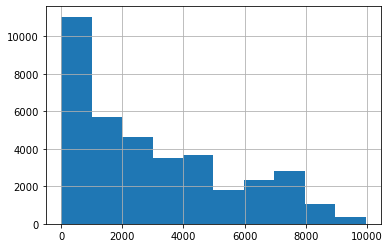

In [21]:
# having a look at histogram (data > 3 std)
more_3sd = df_train_null.loc[:, df_train_null.std()>3]
print(more_3sd.columns.values)
more_3sd['f7'].hist()
plt.show()

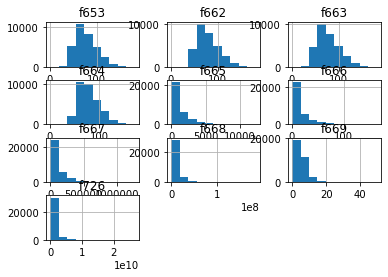

In [22]:
# Histogram view of attributes above 3sd
col_names = more_3sd.columns.values
null_list=[]

for names in col_names:
    if more_3sd[names].isnull().mean()>0.1:
        null_list.append(names)

more_3sd[null_list].hist()
plt.show()


In [23]:
# Impute with central tendency "mean" for data < 3sd
list_3sd = []

col_names = df_train_null.columns.values

for names in col_names:
    if df_train_null[names].std()<3.0:
        list_3sd.append(names)
        
df_train_null[list_3sd] = df_train_null[list_3sd].apply(lambda x: x.fillna(x.mean()),axis=0)


In [23]:
# Determine normality, temporarily drop all Null values and observe if data has normal distribution. 
# Normality tests using Shapiro-Wilks and D'Agostino's K^2 test

df_train_null_temp = df_train_null.dropna() # drop rows with NaN or Null
df_train_null_temp.head(10)

,f7,f8,f14,f15,f17,f18,f19,f20,f21,f22,...,f757,f758,f759,f760,f761,f762,f763,f765,f774,f775
id,,,,,,,,,,,,,,,,,,,,,
43477,2571.0,2217.0,0.7265,0.7203,0.7203,0.7203,0.4871,0.7265,0.7456,0.7456,...,5.3580,4.1735,3.2692,0.062208,6.7402,6.2117,-0.2544,0.00,0.3335,-0.4681
104243,5263.0,3210.0,0.8739,0.8387,0.8455,0.8387,0.6877,0.8387,0.9123,0.9043,...,2.1423,1.8442,1.6037,0.097507,2.5248,2.4164,-0.0877,-0.82,0.3758,0.8740
64652,231.0,2851.0,0.0000,0.0000,0.0000,0.0000,0.0769,0.0000,0.0000,0.0000,...,7.2960,5.5056,4.2457,0.367089,8.9215,7.7206,-1.0000,-0.44,0.2407,-0.8902
74394,6035.0,4017.0,0.8197,0.8197,0.8000,0.8000,0.6552,0.8065,0.8065,0.8065,...,10.7355,9.7894,8.9452,0.044094,12.0256,11.7564,-0.1935,-0.36,0.1657,-0.7181
28213,7248.0,1253.0,0.8636,0.8407,0.8120,0.8120,0.6644,0.8407,0.9500,0.8482,...,8.7038,7.7867,6.9926,0.054783,11.0370,10.7539,-0.0500,-0.75,0.2738,1.0203
15298,2089.0,2366.0,0.7119,0.6942,0.6720,0.6720,0.4874,0.6774,0.7636,0.7304,...,6.0716,4.7609,3.7485,0.050447,8.2824,7.8016,-0.2364,-0.37,0.1780,0.5914
4084,1207.0,5624.0,0.7458,0.7458,0.7458,0.7458,0.4933,0.7521,0.7719,0.7719,...,13.3801,10.8433,8.8615,0.083930,15.4978,14.2721,-0.2281,-0.20,0.3358,-0.3965
15007,7086.0,1888.0,0.7607,0.7177,0.7236,0.7177,0.5187,0.7807,0.8091,0.7946,...,38.2949,32.7099,28.0260,0.048704,44.6593,42.3637,-0.1909,-0.15,0.2551,0.6461
43081,3566.0,313.0,0.5089,0.5044,0.4957,0.4750,0.2072,0.5182,0.5229,0.5044,...,7.5500,6.1528,5.0815,0.236130,8.8199,8.1635,-0.4771,0.00,0.2996,-0.5385


In [24]:
max(df_train_null_temp.isnull().sum())

0

In [25]:
# Shapiro-Wilk's Test, p>0.05 indicates null hypothesis not rejected and thus sample is likely Gaussian (normal distribution)
# In this case, the data sample N > 5000 generated a warning, thus p-value may not be accurate.

from scipy.stats import shapiro

# list of columns
col_names = df_train_null_temp.columns.values

for names in col_names:
    # normality test
    stat, p = shapiro(df_train_null_temp[names])
    print(names, ' Statistics=%.3f, p=%.3f' % (stat, p))


C:\Users\nxa07630\AppData\Local\Continuum\anaconda2\envs\ctai\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


f7  Statistics=0.912, p=0.000
f8  Statistics=0.869, p=0.000
f14  Statistics=0.649, p=0.000
f15  Statistics=0.658, p=0.000
f17  Statistics=0.646, p=0.000
f18  Statistics=0.683, p=0.000
f19  Statistics=0.919, p=0.000
f20  Statistics=0.662, p=0.000
f21  Statistics=0.618, p=0.000
f22  Statistics=0.615, p=0.000
f23  Statistics=0.844, p=0.000
f26  Statistics=0.992, p=0.000
f31  Statistics=0.915, p=0.000
f32  Statistics=0.526, p=0.000
f39  Statistics=0.790, p=0.000
f40  Statistics=0.699, p=0.000
f41  Statistics=0.829, p=0.000
f42  Statistics=0.805, p=0.000
f43  Statistics=0.834, p=0.000
f44  Statistics=0.836, p=0.000
f45  Statistics=0.745, p=0.000
f46  Statistics=0.634, p=0.000
f47  Statistics=0.836, p=0.000
f48  Statistics=0.803, p=0.000
f49  Statistics=0.782, p=0.000
f50  Statistics=0.675, p=0.000
f51  Statistics=0.828, p=0.000
f52  Statistics=0.805, p=0.000
f53  Statistics=0.829, p=0.000
f54  Statistics=0.811, p=0.000
f55  Statistics=0.941, p=0.000
f56  Statistics=0.922, p=0.000
f57  Stati

f389  Statistics=0.803, p=0.000
f392  Statistics=0.857, p=0.000
f393  Statistics=0.866, p=0.000
f394  Statistics=0.966, p=0.000
f397  Statistics=0.705, p=0.000
f398  Statistics=0.705, p=0.000
f399  Statistics=0.700, p=0.000
f401  Statistics=0.853, p=0.000
f402  Statistics=0.765, p=0.000
f412  Statistics=0.842, p=0.000
f413  Statistics=0.688, p=0.000
f422  Statistics=0.880, p=0.000
f432  Statistics=0.857, p=0.000
f433  Statistics=0.648, p=0.000
f434  Statistics=0.978, p=0.000
f435  Statistics=0.978, p=0.000
f436  Statistics=0.815, p=0.000
f437  Statistics=0.926, p=0.000
f438  Statistics=0.928, p=0.000
f439  Statistics=0.912, p=0.000
f440  Statistics=0.925, p=0.000
f441  Statistics=0.978, p=0.000
f442  Statistics=0.994, p=0.000
f443  Statistics=0.991, p=0.000
f444  Statistics=0.957, p=0.000
f448  Statistics=0.721, p=0.000
f451  Statistics=0.541, p=0.000
f452  Statistics=0.832, p=0.000
f453  Statistics=0.832, p=0.000
f454  Statistics=0.828, p=0.000
f455  Statistics=0.699, p=0.000
f456  St

C:\Users\nxa07630\AppData\Local\Continuum\anaconda2\envs\ctai\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [26]:
# D'Agostino's Test, p>0.05 indicates null hypothesis not rejected and thus sample is likely Gaussian (normal distribution)
# Data in p values < 0.05. Thus majority data not gaussian. 

from scipy.stats import normaltest

for names in col_names:
    # normality test
    stat, p = normaltest(df_train_null_temp[names])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2672.304, p=0.000
Statistics=4008.287, p=0.000
Statistics=10057.577, p=0.000
Statistics=9565.156, p=0.000
Statistics=10179.312, p=0.000
Statistics=8175.070, p=0.000
Statistics=3489.219, p=0.000
Statistics=9394.423, p=0.000
Statistics=10636.673, p=0.000
Statistics=10622.162, p=0.000
Statistics=3750.409, p=0.000
Statistics=340.751, p=0.000
Statistics=5647.742, p=0.000
Statistics=13227.524, p=0.000
Statistics=6235.608, p=0.000
Statistics=7975.195, p=0.000
Statistics=4343.863, p=0.000
Statistics=7233.833, p=0.000
Statistics=3705.363, p=0.000
Statistics=7923.671, p=0.000
Statistics=8541.679, p=0.000
Statistics=10475.515, p=0.000
Statistics=6235.431, p=0.000
Statistics=7165.274, p=0.000
Statistics=7399.697, p=0.000
Statistics=9371.546, p=0.000
Statistics=5859.372, p=0.000
Statistics=7234.057, p=0.000
Statistics=2733.790, p=0.000
Statistics=9496.685, p=0.000
Statistics=3147.479, p=0.000
Statistics=3465.856, p=0.000
Statistics=2567.401, p=0.000
Statistics=7233.833, p=0.000
Statistic

Statistics=22347.425, p=0.000
Statistics=4383.944, p=0.000
Statistics=25991.268, p=0.000
Statistics=2104.977, p=0.000
Statistics=2104.997, p=0.000
Statistics=2173.385, p=0.000
Statistics=4664.605, p=0.000
Statistics=10548.277, p=0.000
Statistics=2672.304, p=0.000
Statistics=35845.576, p=0.000
Statistics=16075.178, p=0.000
Statistics=2395.443, p=0.000
Statistics=20249.083, p=0.000
Statistics=1923.508, p=0.000
Statistics=1923.564, p=0.000
Statistics=1961.167, p=0.000
Statistics=3652.961, p=0.000
Statistics=6799.420, p=0.000
Statistics=2672.304, p=0.000
Statistics=5596.486, p=0.000
Statistics=10136.326, p=0.000
Statistics=1801.048, p=0.000
Statistics=13429.337, p=0.000
Statistics=7386.513, p=0.000
Statistics=514.188, p=0.000
Statistics=372.718, p=0.000
Statistics=723.601, p=0.000
Statistics=10684.738, p=0.000
Statistics=7653.488, p=0.000
Statistics=20451.020, p=0.000
Statistics=16300.966, p=0.000
Statistics=16299.884, p=0.000
Statistics=136271.889, p=0.000
Statistics=13783.044, p=0.000
St

In [27]:
# Since most of the data is not normal distribution, impute with Median central tendency.

df_train_null = df_train_null.apply(lambda x: x.fillna(x.median()),axis=0)

In [29]:
# Check if any null values remain.

max(df_train_null.isnull().sum())

0

In [30]:
df_train_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36915 entries, 43477 to 56924
Columns: 513 entries, f7 to f775
dtypes: float64(513)
memory usage: 144.8 MB
